In [1]:
# Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils

In [2]:
#fetching the data
data = fetch_california_housing(as_frame=True)
print(data.frame.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [3]:
#using pandas to get dataset so we dont need to use .frame everytime
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
#basic description of the dataset
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
#first few rows of the target column
data.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

# Preprocessing the Data

In [6]:
df.isnull().sum()     
#This shows that there are no null values in any of the attributes hence we will not need to preprocess the data.

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

<AxesSubplot:>

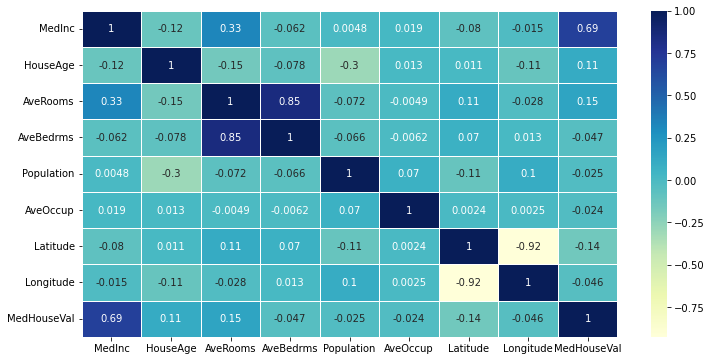

In [7]:
#The Heatmap give us an insight on the correlation between different attributes in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(data.frame.corr(),
            cmap = 'YlGnBu',
            linewidths = 0.5,
            annot = True)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

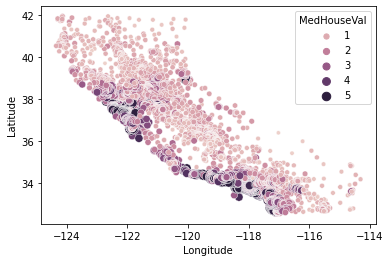

In [8]:
#The x- and y-axis is the latitude and longitude and the circle size and
#color is linked with the house value in the district.
sns.scatterplot(data=data.frame, x="Longitude", y="Latitude",size="MedHouseVal",hue="MedHouseVal")

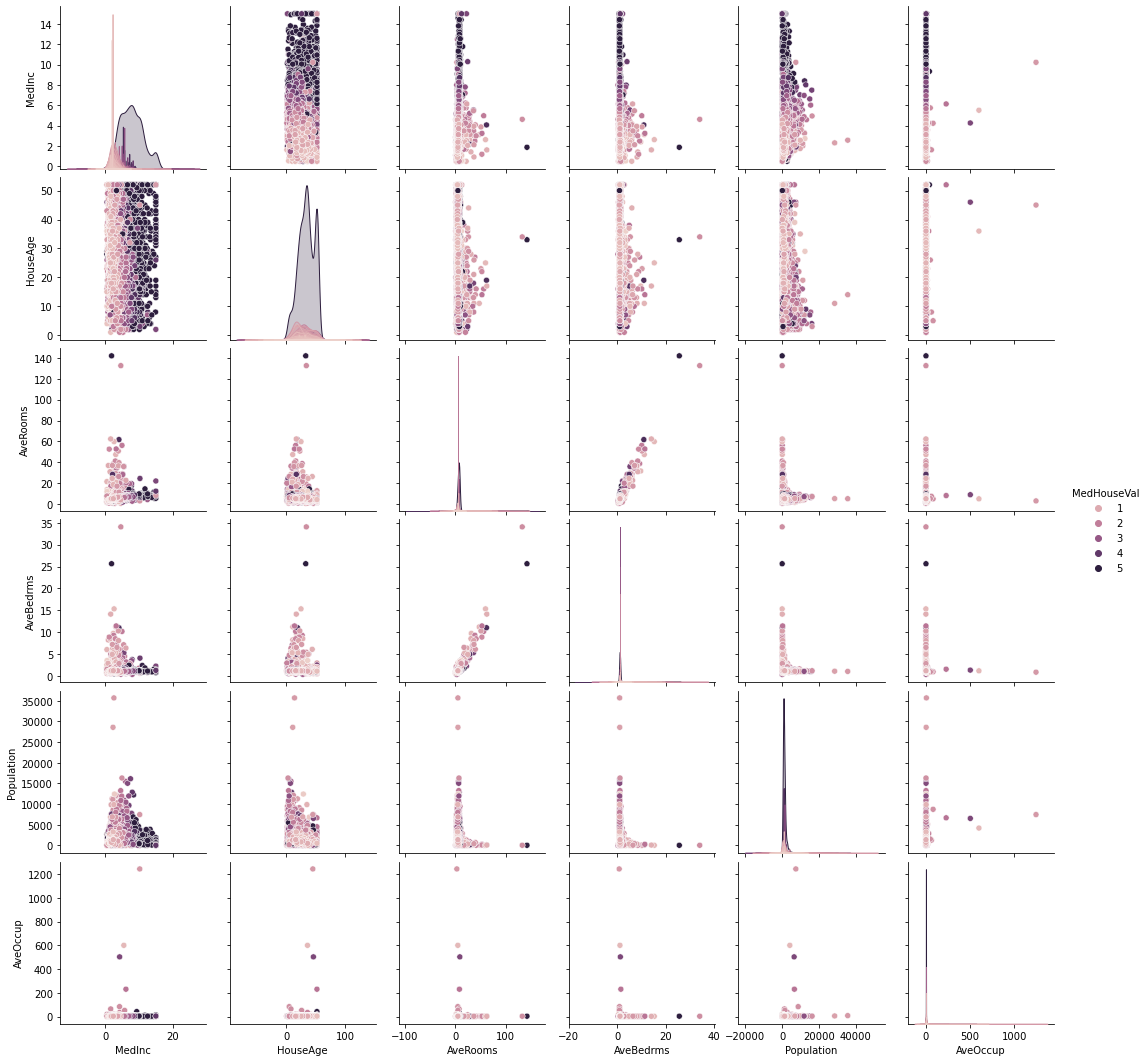

In [9]:
columns_drop = ["Longitude", "Latitude"]
subset = data.frame.drop(columns=columns_drop)
sns.pairplot(data=subset, hue="MedHouseVal")

In [10]:
#assign target attribute to y and all other attribute to x
y = data.frame['MedHouseVal']
x = data.frame.drop(['MedHouseVal'], axis=1)

#spliting data for testing and training
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2, random_state=35)


# Model 1 Linear Regression

In [11]:
#Applying linearRegression
LR_model = LinearRegression()

# Training the Random Forest model to the data
LR_model.fit(X_train, Y_train)

#predicting the result
LR_Pred = LR_model.predict(X_valid)


print('Predicted response:', LR_Pred) #printing the predicted output
print("Mean absolute error:",mean_absolute_percentage_error(Y_valid, LR_Pred)) #calculating mean absolute error
print("Mean squeare error:",mean_squared_error(Y_valid, LR_Pred)) #calculting mean square error
LR_score = LR_model.score(X_valid,Y_valid) #calculating the accuracy of the model for given dataset
print("Accuracy of the LR model: ",LR_score*100)

Predicted response: [2.97038361 0.43859016 2.43872077 ... 1.68575461 1.88138012 2.46360807]
Mean absolute error: 0.3131290522899773
Mean squeare error: 0.533291287389515
Accuracy of the LR model:  60.47062398700981


# Model 2 Random Forest

In [12]:
#model 2 random forest

RF_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Training the Random Forest model to the data
RF_model.fit(X_train, Y_train)

#predicting the output
RF_Pred = RF_model.predict(X_valid)

print('Predicted response:', RF_Pred) #printing the predicted output
print("Mean absolute error:",mean_absolute_percentage_error(Y_valid, RF_Pred)) #calculating mean absolute error
print("Mean squeare error:",mean_squared_error(Y_valid, RF_Pred)) #calculting mean square error
RF_score=RF_model.score(X_valid,Y_valid) #calculating the accuracy of the model for given dataset
print("Accuracy of the RF model: ",RF_score*100)

Predicted response: [2.5661 0.9755 2.079  ... 0.9819 1.8872 2.0276]
Mean absolute error: 0.19255720926606157
Mean squeare error: 0.2807425743486027
Accuracy of the RF model:  79.190399230777


# Model 3 Decision Tree


In [13]:
# Model 3 Decision Tree
DT_model = DecisionTreeRegressor(random_state=0)

# Training the Decision Tree model to the data
DT_model.fit(X_train, Y_train)

#predicting the output
DT_Pred = DT_model.predict(X_valid)

print('Predicted response:', DT_Pred) #printing the predicted output
print("Mean absolute error:",mean_absolute_percentage_error(Y_valid, DT_Pred)) #calculating mean absolute error
print("Mean squeare error:",mean_squared_error(Y_valid, DT_Pred)) #calculting mean square error
DT_score=DT_model.score(X_valid,Y_valid) #calculating the accuracy of the model for given dataset
print("Accuracy of the DT model: ",DT_score*100)

Predicted response: [2.976 1.241 1.397 ... 1.052 1.96  2.217]
Mean absolute error: 0.24560471405363118
Mean squeare error: 0.5209112631291425
Accuracy of the DT model:  61.38827376980247


In [14]:
#printing the original and predicted data by all three models.
predictdataset = pd.DataFrame()
predictdataset['original'] = Y_valid
predictdataset['LR_Predicted'] = LR_Pred
predictdataset['RF_Predicted'] = RF_Pred
predictdataset['DT_Predicted'] = DT_Pred
predictdataset

,original,LR_Predicted,RF_Predicted,DT_Predicted
9288,4.359,2.970384,2.5661,2.976
1878,1.105,0.438590,0.9755,1.241
20439,2.641,2.438721,2.0790,1.397
10957,1.872,1.738766,1.6931,1.584
10316,3.049,2.591785,2.6392,4.222
...,...,...,...,...
13044,2.034,1.239351,1.6025,2.165
11419,2.904,2.830357,2.9972,3.440
1804,0.903,1.685755,0.9819,1.052
7136,1.894,1.881380,1.8872,1.960
